# logistics_regression (Week 3 homework)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
#https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/03-classification/homework.md

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Features

For the rest of the homework, you'll need to use only these columns:

In [5]:
features = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households',
            'median_income','median_house_value','ocean_proximity']


In [6]:
df[features].T

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84,...,39.29,39.33,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25,...,-121.32,-121.4,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0,42.0,52.0,...,11.0,15.0,15.0,27.0,28.0,25.0,18.0,17.0,18.0,16.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0,2555.0,3549.0,...,2640.0,2655.0,2319.0,2080.0,2332.0,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0,665.0,707.0,...,505.0,493.0,416.0,412.0,395.0,374.0,150.0,485.0,409.0,616.0
population,322.0,2401.0,496.0,558.0,565.0,413.0,1094.0,1157.0,1206.0,1551.0,...,1257.0,1200.0,1047.0,1082.0,1041.0,845.0,356.0,1007.0,741.0,1387.0
households,126.0,1138.0,177.0,219.0,259.0,193.0,514.0,647.0,595.0,714.0,...,445.0,432.0,385.0,382.0,344.0,330.0,114.0,433.0,349.0,530.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0,269700.0,299200.0,241400.0,226700.0,261100.0,...,112000.0,107200.0,115600.0,98300.0,116800.0,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,...,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND


### Data preparation

Select only the features from above and fill in the missing values with median. \
Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.\
Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.\
Create a new column population_per_household by dividing the column population by the column households from dataframe.


In [7]:
df[features].isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [9]:
df[features].isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
df['total_bedrooms'].isnull().sum()

0

In [11]:
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [12]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms'] 

In [13]:
df['population_per_household'] = df['population'] / df['households'] 

### Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

In [14]:
df['ocean_proximity'].groupby(df['ocean_proximity']).count().sort_values(ascending=False)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### ans = 1H OCEAN 

### Question 2

Create the correlation matrix for the numerical features of your train dataset.\
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.\
What are the two features that have the biggest correlation in this dataset?


In [15]:
list(df.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [16]:
numerical = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms',
             'population','households','median_income', 'median_house_value', 
             'rooms_per_household','bedrooms_per_room','population_per_household']

In [17]:
df[numerical].columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [18]:
df[numerical].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.081205,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.098619,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.135622,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187381,-0.024581
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,0.001765,0.071649,-0.028325
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.010035,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.080598,0.034498,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.326895,-0.545298,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.233303,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001765,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.370308,-0.004852


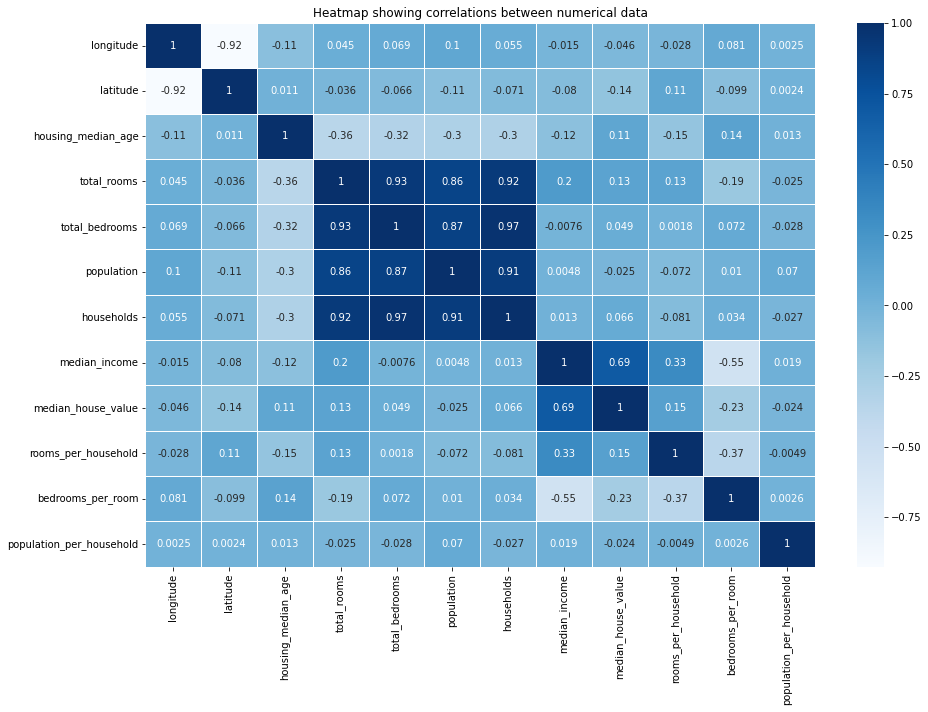

In [19]:
#@ INSPECTING HEATMAP:
plt.figure(figsize=(15,10))  
sns.heatmap(df[numerical].corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [20]:
#@ INSPECTING CORRELATION:
df[numerical].corr().unstack().sort_values(ascending = False)[:15]

longitude                 longitude                   1.000000
latitude                  latitude                    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_house_value        median_house_value          1.000000
median_income             median_income               1.000000
households                households                  1.000000
population                population                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
population_per_household  population_per_household    1.000000
total_bedrooms            households                  0.974366
households                total_bedrooms              0.974366
total_bedrooms            total_rooms                 0.927058
dtype: float64

### 2b Make median_house_value binary

 We need to turn the median_house_value variable from numeric into binary.\
 Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.


In [21]:
df['median_house_value'].mean()

206855.81690891474

In [22]:
df['above_average'] = (df['median_house_value'] >= df['median_house_value'].mean()).astype(int)

In [23]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209,0


## 2c
Split your data in train/val/test sets, with 60%/20%/20% distribution. \
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.\
Make sure that the target value (median_house_value) is not in your dataframe.


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [26]:
print(len(df_train))
print(len(df_val))
print(len(df_test))

12384
4128
4128


In [27]:
y_train = df_train['above_average']
y_val = df_val['above_average']
y_test = df_test['above_average']

In [28]:
del df_train['median_house_value']
del df_train['above_average']

del df_val['median_house_value']
del df_val['above_average']

del df_test['median_house_value']
del df_test['above_average']

del df['median_house_value']
del df['above_average']

# Question 3

    Calculate the mutual information score between above_average and ocean_proximity . Use the training set only.
    Round it to 2 decimals using round(score, 2)
    What is their mutual information score?


In [29]:
from sklearn.metrics import mutual_info_score

In [30]:
#note that y train =df_train['above_average'] after deletion
score = mutual_info_score(y_train, df_train['ocean_proximity'])

In [31]:
score

0.10138385763624205

# Question 4

Now let's train a logistic regression\
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.\
Fit the model on the training dataset.\
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:\
      model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)\
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.


In [32]:
from sklearn.feature_extraction import DictVectorizer

In [33]:
categorical = ['ocean_proximity']

In [34]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [35]:
numerical = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
             'total_bedrooms', 'population', 'households', 'median_income',
              'rooms_per_household', 'bedrooms_per_room',
             'population_per_household']

In [36]:
num = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "rooms_per_household", 
       "bedrooms_per_room", "population_per_household"]

In [37]:
train_dict = df_train[numerical + categorical].to_dict(orient='records')

In [38]:
train_dict[0]

{'longitude': -119.67,
 'latitude': 34.43,
 'housing_median_age': 39.0,
 'total_rooms': 1467.0,
 'total_bedrooms': 381.0,
 'population': 1404.0,
 'households': 374.0,
 'median_income': 2.3681,
 'rooms_per_household': 3.9224598930481283,
 'bedrooms_per_room': 0.25971370143149286,
 'population_per_household': 3.7540106951871657,
 'ocean_proximity': '<1H OCEAN'}

In [39]:
#let dictvecotirzer return numpy array
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [40]:
X_train.shape

(12384, 16)

In [41]:
dv.feature_names_

['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [42]:
#to train model
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [44]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [45]:
#validation 
df_val_dict = df_val[numerical + categorical].to_dict(orient='records')

In [46]:
X_val = dv.transform(df_val_dict)

In [47]:
X_val.shape

(4128, 16)

In [48]:
y_pred = model.predict(X_val)

In [49]:
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [50]:
y_val

2071     0
2612     0
10838    1
4061     1
10767    1
        ..
2285     0
16904    1
18139    1
11471    1
788      0
Name: above_average, Length: 4128, dtype: int64

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
#average_above = y_pred > 0.5

In [61]:
score = accuracy_score(y_val, y_pred)

In [62]:
scores = np.round(score,2)

In [63]:
scores

0.84

### ANS = 0.84

# Question 5

Let's find the least useful feature using the feature elimination technique.\
Train a model with all these features (using the same parameters as in Q4).\
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.\
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.\
Which of following feature has the smallest difference?

In [95]:

all_acc = []
all_mod = []

for i in range(0,11):

    numer = ['ocean_proximity','longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households',
             'median_income','rooms_per_household','bedrooms_per_room','population_per_household']

    feats = numer
    removed = feats[i]
    feats.remove(feats[i])

    dv = DictVectorizer(sparse=False)
    
    
    train_dict = df_train[feats].to_dict(orient='records')
    df_val_train = df_val[feats].to_dict(orient='records')
    
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train,y_train)
    
    X_val = dv.transform(df_val_train)
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)

  
    all_acc.append(score)
    all_mod.append(feats[i])
    print (f'model without {removed} = {score}')

model without ocean_proximity = 0.8195251937984496
model without longitude = 0.8311531007751938
model without latitude = 0.8338178294573644
model without housing_median_age = 0.8313953488372093
model without total_rooms = 0.8369670542635659
model without total_bedrooms = 0.8357558139534884
model without population = 0.8263081395348837
model without households = 0.8330910852713178
model without median_income = 0.7863372093023255
model without rooms_per_household = 0.8355135658914729
model without bedrooms_per_room = 0.8347868217054264


In [96]:
tot_acc = dict(zip(all_mod, all_acc))

In [97]:
tot_acc 

{'longitude': 0.8195251937984496,
 'latitude': 0.8311531007751938,
 'housing_median_age': 0.8338178294573644,
 'total_rooms': 0.8313953488372093,
 'total_bedrooms': 0.8369670542635659,
 'population': 0.8357558139534884,
 'households': 0.8263081395348837,
 'median_income': 0.8330910852713178,
 'rooms_per_household': 0.7863372093023255,
 'bedrooms_per_room': 0.8355135658914729,
 'population_per_household': 0.8347868217054264}

In [98]:
tot_acc = pd.DataFrame.from_dict([tot_acc])
tot_acc = tot_acc.T

In [99]:
tot_acc

,0
longitude,0.819525
latitude,0.831153
housing_median_age,0.833818
total_rooms,0.831395
total_bedrooms,0.836967
population,0.835756
households,0.826308
median_income,0.833091
rooms_per_household,0.786337
bedrooms_per_room,0.835514


In [100]:
tot_acc['values'] = tot_acc[0] 

In [101]:
#del tot_acc['value']
del tot_acc[0] 

In [102]:
tot_acc['rank'] = (tot_acc['values']).rank()

In [103]:
tot_acc

,values,rank
longitude,0.819525,2.0
latitude,0.831153,4.0
housing_median_age,0.833818,7.0
total_rooms,0.831395,5.0
total_bedrooms,0.836967,11.0
population,0.835756,10.0
households,0.826308,3.0
median_income,0.833091,6.0
rooms_per_household,0.786337,1.0
bedrooms_per_room,0.835514,9.0


In [104]:
#index = pd.Index(range(1,12,1))
#tot_acc = tot_acc.set_index(index)
tot_acc['features'] = all_mod

In [105]:
tot_acc = tot_acc.sort_values('rank')
tot_acc.reset_index()


,index,values,rank,features
0,rooms_per_household,0.786337,1.0,rooms_per_household
1,longitude,0.819525,2.0,longitude
2,households,0.826308,3.0,households
3,latitude,0.831153,4.0,latitude
4,total_rooms,0.831395,5.0,total_rooms
5,median_income,0.833091,6.0,median_income
6,housing_median_age,0.833818,7.0,housing_median_age
7,population_per_household,0.834787,8.0,population_per_household
8,bedrooms_per_room,0.835514,9.0,bedrooms_per_room
9,population,0.835756,10.0,population


In [118]:
ranks = []
acc_feat = []
def check_diff(df):
    for i in range ((len(df['values'].values))):
        diff = scores - df['values'].values[i]
        diff = abs(diff)
        feat = df['features'][i]
        ranks.append(diff)
        acc_feat.append(feat)
    return acc_feat, ranks

In [119]:

val_rank_feat_, val_rank = check_diff(tot_acc)
accur = dict(zip(val_rank_feat_, val_rank))

In [120]:
final= pd.DataFrame
final = pd.DataFrame.from_dict([accur])

In [121]:
final = final.T

In [122]:
final['value'] = final[0]

In [123]:
del final[0]

In [124]:
final['rank'] = final.rank()

In [125]:
final.sort_values('rank')

,value,rank
total_bedrooms,0.003033,1.0
population,0.004244,2.0
bedrooms_per_room,0.004486,3.0
population_per_household,0.005213,4.0
housing_median_age,0.006182,5.0
median_income,0.006909,6.0
total_rooms,0.008605,7.0
latitude,0.008847,8.0
households,0.013692,9.0
longitude,0.020475,10.0


### population has the smallest difference from the options given

# Question 6

For this question, we'll see how to use a linear regression model from Scikit-Learn\
We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.\
Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.\
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10] Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.\
If there are multiple options, select the smallest alpha.

In [126]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error

In [127]:
df = pd.read_csv('housing.csv')

In [133]:
df_train_full,df_test  = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [134]:
y_train = df_train['median_house_value']
y_val = df_val['median_house_value']
y_test = df_test['median_house_value']

In [135]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [136]:
a = [0, 0.01, 0.1, 1, 10]

for i in range(len(a)):
    a = [0, 0.01, 0.1, 1, 10]
    a = a[i]
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val,y_pred))
    print(f'a = {a} and RMSE = {rmse}')

a = 0 and RMSE = 0.5240636193092854
a = 0.01 and RMSE = 0.5240636193263986
a = 0.1 and RMSE = 0.5240636194889765
a = 1 and RMSE = 0.5240636211233102
a = 10 and RMSE = 0.5240636374409846


### answer alpha = 0